In [1]:
import os, sys
sys.path.insert(0, os.environ['PROJECT_PATH'])

In [2]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

sns.set()
%matplotlib inline

In [11]:
path_to_locs = os.path.join(os.environ['DATA_PATH'], 'interim', 'augmented_meetup_locations.csv')
loc_df = pd.read_csv(path_to_locs, encoding='latin1')

In [12]:
sample_cities = [ 'Charlottesville', 'Trenton', 'Boulder' ]
sample_loc_df = loc_df[ loc_df['City'].isin(sample_cities) ]

In [9]:
path_to_sample_events = os.path.join(os.environ['DATA_PATH'], 'raw', 'topics', 'sample_events.csv')

In [10]:
sample_events_df = pd.read_csv(path_to_sample_events, encoding='latin1')

In [25]:
master_df = pd.merge(sample_events_df, sample_loc_df[ ['City', 'Latitude', 'Longitude'] ], 
                                      left_on=['latitude', 'longitude'], right_on=['Latitude', 'Longitude'], 
                                      how='inner').drop(['Latitude', 'Longitude'], axis=1)
print(sample_events_df.shape, master_df.shape)
master_df.head()

((10655, 6), (10655, 7))


,id,time,group.category.id,yes_rsvp_count,latitude,longitude,City
0,rrtlvlywqbvb,1513470600000,34.0,4,46.2,-112.08,Boulder
1,pblrxlywqbbc,1513821600000,22.0,3,46.2,-112.08,Boulder
2,xscxtlywqbcc,1513908000000,34.0,4,46.2,-112.08,Boulder
3,244413343,1514649600000,23.0,9,46.2,-112.08,Boulder
4,245727930,1516239000000,18.0,7,46.2,-112.08,Boulder


### Exploring the time events took place

In [55]:
master_df['formatted_time'] = pd.to_datetime(master_df['time'], unit='ms').dt.year
master_df.head()

,id,time,group.category.id,yes_rsvp_count,latitude,longitude,City,formatted_time
0,rrtlvlywqbvb,1513470600000,34.0,4,46.2,-112.08,Boulder,2017
1,pblrxlywqbbc,1513821600000,22.0,3,46.2,-112.08,Boulder,2017
2,xscxtlywqbcc,1513908000000,34.0,4,46.2,-112.08,Boulder,2017
3,244413343,1514649600000,23.0,9,46.2,-112.08,Boulder,2017
4,245727930,1516239000000,18.0,7,46.2,-112.08,Boulder,2018


()


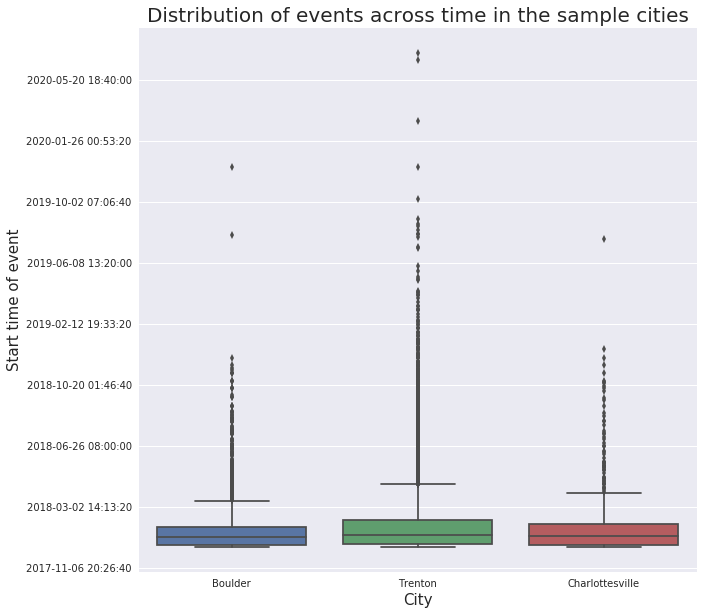

In [58]:
plt.subplots(figsize=(10, 10))
ax = sns.boxplot(x='City', y='time', data=master_df)

yticks = ax.get_yticks()
ax.set_yticklabels([pd.to_datetime(tm, unit='ms') for tm in yticks])
ax.axes.set_title("Distribution of events across time in the sample cities",fontsize=20)
ax.set_xlabel("City",fontsize=15)
ax.set_ylabel("Start time of event",fontsize=15)

print()

In [64]:
import requests

url_template = "https://api.meetup.com/2/categories?&sign=true&photo-host=public&page=40&key={api_key}"

res = requests.get(url_template.format(api_key=os.environ['API_KEY']))

payload = res.json()

category_ids = { item['id']: item['name'] for item in payload['results'] }

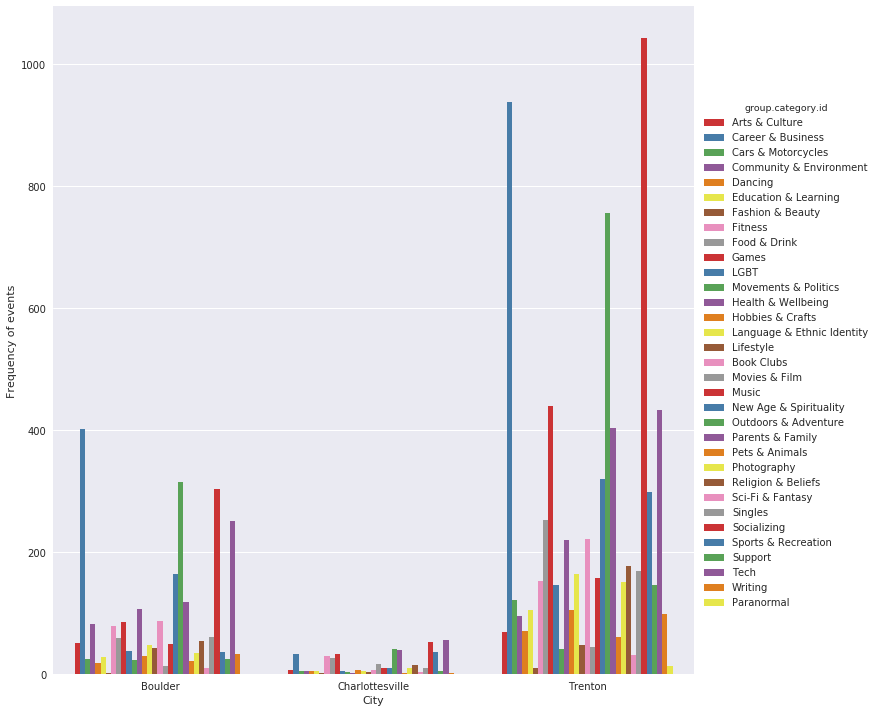

In [109]:
# plt.subplots(figsize=(15, 15))
events_count = master_df.groupby(['City', 'group.category.id']).count().reset_index()

events_count['group.category.id'] = events_count['group.category.id'].apply(lambda x: category_ids[x])

# events_count.head()
# flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
g = sns.factorplot(x='City', y='id', hue='group.category.id', palette=sns.color_palette('Set1', 100), 
                   size=10, kind='bar', data=events_count)
g.set_ylabels('Frequency of events')
print